In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
import sys
sys.path.append('..')

import GaussianODEs as ode
import GaussianAlgorithms as algo
importlib.reload(ode)
importlib.reload(algo)

<module 'GaussianAlgorithms' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianAlgorithms.py'>

In [2]:
mu = 1
sigma = 5
mu0 = 0
sigma0 = 1

In [3]:
Niter = 4000
gamma = 0.005
mean_eq_wfr, var_eq_wfr, kl_wfrinf = ode.wfr_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma)

In [4]:
N = 1000
X0 = np.random.normal(size = N)

## SMC-WFR

In [5]:
x, W = algo.SMC_WFR(gamma, Niter, mu, sigma, mu0, sigma0, X0)

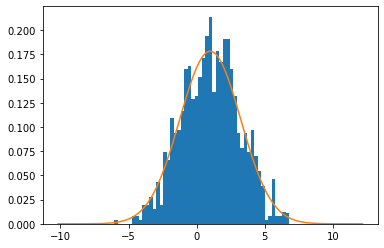

In [6]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [7]:
mean_smcwfr = np.zeros(Niter)
var_smcwfr = np.zeros(Niter)
kl_smcwfr = np.zeros(Niter)
for i in range(Niter):
    mean_smcwfr[i] = np.sum(x[i, :]*W[i, :])
    var_smcwfr[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smcwfr[i]**2
    kl_smcwfr[i] = ode.KL(mean_smcwfr[i], var_smcwfr[i], mu, sigma)

## SMC-ULA

In [8]:
x, W = algo.SMC_ULA(gamma, Niter, mu, sigma, mu0, sigma0, X0)

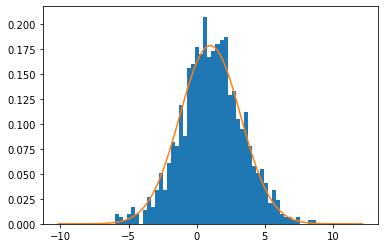

In [9]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [10]:
mean_smcula = np.zeros(Niter)
var_smcula = np.zeros(Niter)
kl_smcula = np.zeros(Niter)
for i in range(Niter):
    mean_smcula[i] = np.sum(x[i, :]*W[i, :])
    var_smcula[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smcula[i]**2
    kl_smcula[i] = ode.KL(mean_smcula[i], var_smcula[i], mu, sigma)

## MALA

In [11]:
x, W = algo.SMC_MALA(gamma, Niter, mu, sigma, mu0, sigma0, X0)

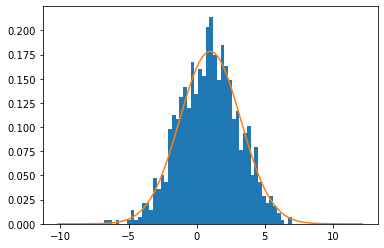

In [12]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [13]:
mean_smcmala = np.zeros(Niter)
var_smcmala = np.zeros(Niter)
kl_smcmala = np.zeros(Niter)
for i in range(Niter):
    mean_smcmala[i] = np.sum(x[i, :]*W[i, :])
    var_smcmala[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smcmala[i]**2
    kl_smcmala[i] = ode.KL(mean_smcmala[i], var_smcmala[i], mu, sigma)

Text(0, 0.5, 'KL$_t$')

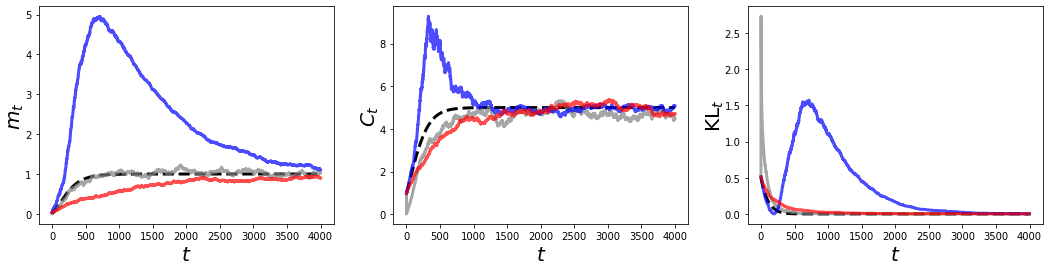

In [14]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smcwfr, label = 'SMC-WFR', color = 'gray', alpha = 0.7, lw = 3)
plt.plot(mean_smcula, label = 'SMC-ULA', color = 'blue', alpha = 0.7, lw = 3)
plt.plot(mean_smcmala, label = 'SMC-MALA', color = 'red', alpha = 0.7, lw = 3)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
# plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smcwfr, label = 'SMC-WFR', color = 'gray', alpha = 0.7, lw = 3)
plt.plot(var_smcula, label = 'SMC-ULA', color = 'blue', alpha = 0.7, lw = 3)
plt.plot(var_smcmala, label = 'SMC-MALA', color = 'red', alpha = 0.7, lw = 3)
# plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_wfrinf, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smcwfr, label = 'SMC-WFR', color = 'gray', alpha = 0.7, lw = 3)
plt.plot(kl_smcula, label = 'SMC-ULA', color = 'blue', alpha = 0.7, lw = 3)
plt.plot(kl_smcmala, label = 'SMC-MALA', color = 'red', alpha = 0.7, lw = 3)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
# legend = plt.legend(loc = 'lower center', bbox_to_anchor=(-1, -0.5), ncol = 6, fontsize = 20)
# plt.savefig('SMC_WFR_gaussian_alternatives_target1.pdf', bbox_inches="tight")

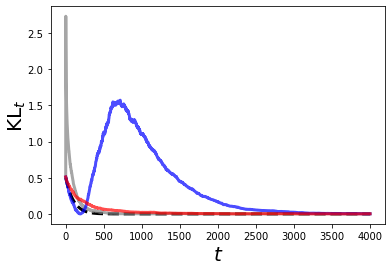

In [17]:
plt.plot(kl_wfrinf, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smcwfr, label = 'SMC-WFR', color = 'gray', alpha = 0.7, lw = 3)
plt.plot(kl_smcula, label = 'SMC-ULA', color = 'blue', alpha = 0.7, lw = 3)
plt.plot(kl_smcmala, label = 'SMC-MALA', color = 'red', alpha = 0.7, lw = 3)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
# legend = plt.legend(loc = 'lower center', bbox_to_anchor=(-1, -0.5), ncol = 6, fontsize = 20)
# plt.savefig('SMC_WFR_gaussian_alternatives_target2.pdf', bbox_inches="tight")

In [16]:
# def export_legend(legend, filename="legend_smc.pdf", expand=[-5,-5,5,5]):
#     fig  = legend.figure
#     fig.canvas.draw()
#     bbox  = legend.get_window_extent()
#     bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
#     bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(filename, dpi="figure", bbox_inches=bbox)

# export_legend(legend)
# plt.show()